In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("./data/health_insurance.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Data Description

In [3]:
df.shape

(381109, 12)

In [4]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
data_numerik = df.drop(columns='id')
data_numerik.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.82,15.51,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,1.00,0.05,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.39,13.23,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.46,0.50,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.39,17213.16,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.03,54.20,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.35,83.67,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.12,0.33,0.0,0.0,0.0,0.0,1.0


In [7]:
df.describe(include='O').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [8]:
insurance_desc = []

for i in df.columns:
    insurance_desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [9]:
pd.DataFrame(data = insurance_desc, columns = [
    'Data Feature',
    'Data types',
    'Null',
    'Null pct',
    'Unique',
    'Unique Sample'
])

,Data Feature,Data types,Null,Null pct,Unique,Unique Sample
0,id,int64,0,0.0,381109,"[42692, 166851]"
1,Gender,object,0,0.0,2,"[Female, Male]"
2,Age,int64,0,0.0,66,"[50, 25]"
3,Driving_License,int64,0,0.0,2,"[1, 0]"
4,Region_Code,float64,0,0.0,53,"[26.0, 11.0]"
5,Previously_Insured,int64,0,0.0,2,"[1, 0]"
6,Vehicle_Age,object,0,0.0,3,"[1-2 Year, > 2 Years]"
7,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
8,Annual_Premium,float64,0,0.0,48838,"[35198.0, 55154.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[124.0, 65.0]"


In [10]:
df[df.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


### Data Visualization

In [11]:
pd.DataFrame(df['Gender'].value_counts())

,Gender
Male,206089
Female,175020


In [12]:
# Binning column age
# 15 - 23 = Gen z, 24 - 39 = Millennials
# 40 - 56 = Gen X, 57 - max = Boomer

bin_age_generation = [15, 23, 39, 56, df['Age'].max()]
label_age_generation = ['Gen Z', 'Millennials', 'Gen X', 'Boomer']

df['Generation'] = pd.cut(df['Age'], bins = bin_age_generation, labels = label_age_generation)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Generation
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Gen X
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Boomer
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Gen X
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Gen Z
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Millennials


<AxesSubplot:xlabel='Age', ylabel='Density'>

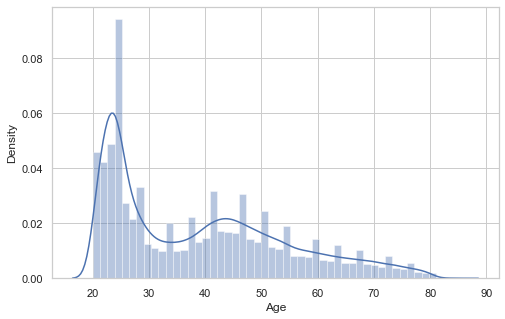

In [13]:
plt.figure(figsize=(8, 5))
sns.distplot(df['Age'])

,Generation
Millennials,141547
Gen X,113500
Gen Z,67909
Boomer,58153


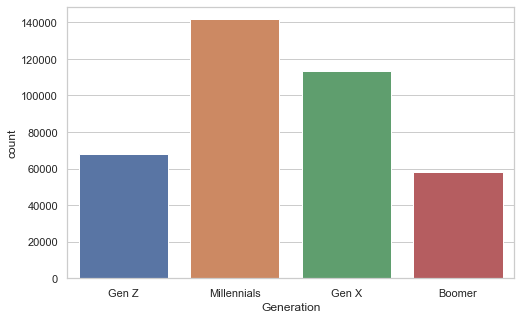

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(df.Generation)

pd.DataFrame(df.Generation.value_counts())

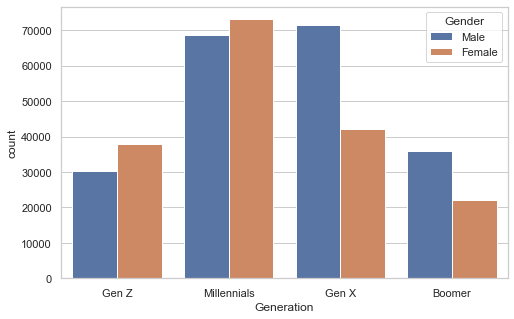

In [15]:
plt.figure(figsize = (8, 5))
sns.countplot(df['Generation'], hue = df['Gender'])
plt.show()

<AxesSubplot:xlabel='Annual_Premium'>

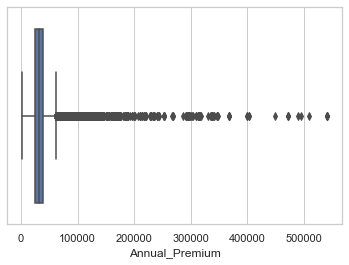

In [16]:
sns.boxplot(df.Annual_Premium)

,Response
0,334399
1,46710


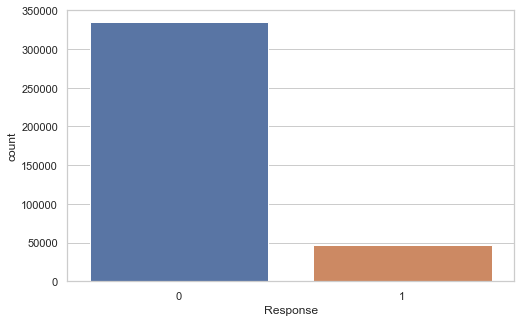

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(df.Response)

pd.DataFrame(df.Response.value_counts())

In [18]:
pd.crosstab(index=df['Driving_License'], columns=df['Response'], margins=True, margins_name='Total')

Response,0,1,Total
Driving_License,,,
0,771,41,812
1,333628,46669,380297
Total,334399,46710,381109


Response,0,1,Total
Gender,,,
Female,156835,18185,175020
Male,177564,28525,206089
Total,334399,46710,381109


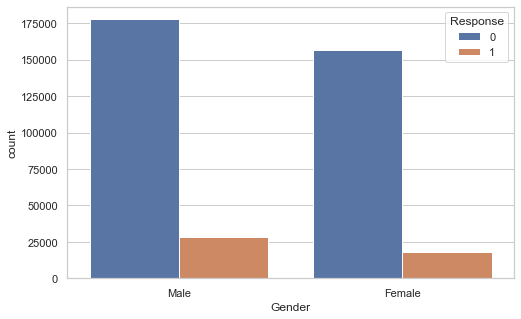

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x = df.Gender, hue = df.Response)

pd.crosstab(index=df['Gender'], columns=df['Response'], margins=True, margins_name='Total')

,Vehicle_Age
1-2 Year,200316
< 1 Year,164786
> 2 Years,16007


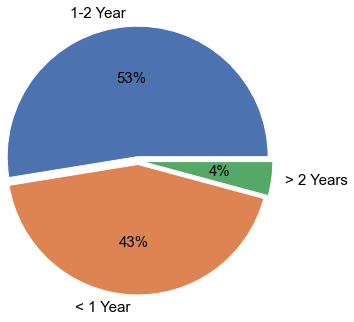

In [20]:
df_umur_kendaraan = [200316, 164786, 16007]
nama = ['1-2 Year', '< 1 Year', '> 2 Years']

plt.pie( df_umur_kendaraan, labels=nama,
        startangle=0,
        textprops = {
            'size' : 15,
            'color' : 'black'
        },
        autopct='%1.0f%%',
        radius= 1.5,
        explode=(.05, .04, .05))

pd.DataFrame(df.Vehicle_Age.value_counts())

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

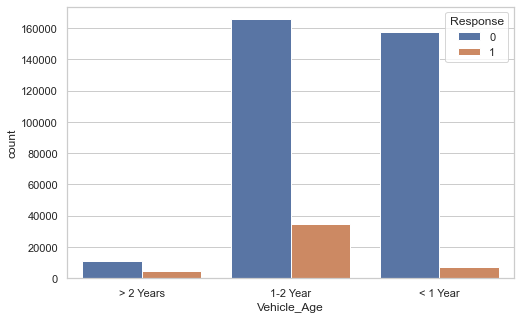

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x = df.Vehicle_Age, hue = df.Response)

In [22]:
pd.crosstab(index=df['Previously_Insured'], columns=df['Response'], margins=True, margins_name='Total')

Response,0,1,Total
Previously_Insured,,,
0,159929,46552,206481
1,174470,158,174628
Total,334399,46710,381109


In [23]:
pd.crosstab(index=df['Response'],columns=[df['Vehicle_Age']
                                                     ,df['Vehicle_Damage']], margins=True, margins_name='Total').T

Response                         0      1   Total
Vehicle_Age Vehicle_Damage                       
1-2 Year    No               71495    596   72091
            Yes              94015  34210  128225
< 1 Year    No              116204    386  116590
            Yes              41380   6816   48196
> 2 Years   No                  15      0      15
            Yes              11290   4702   15992
Total                       334399  46710  381109

In [24]:
pd.crosstab(index=df['Response'],columns=[df['Previously_Insured']
                                                     ,df['Generation']], margins=True, margins_name='Total')

Previously_Insured      0                                1                     \
Generation          Gen Z Millennials  Gen X Boomer  Gen Z Millennials  Gen X   
Response                                                                        
0                   24933       44939  59047  31010  40576       81778  31448   
1                    2379       14748  22961   6464     21          82     44   
Total               27312       59687  82008  37474  40597       81860  31492   

Previously_Insured          Total  
Generation         Boomer          
Response                           
0                   20668  334399  
1                      11   46710  
Total               20679  381109

AttributeError: 'AxesSubplot' object has no attribute 'T'

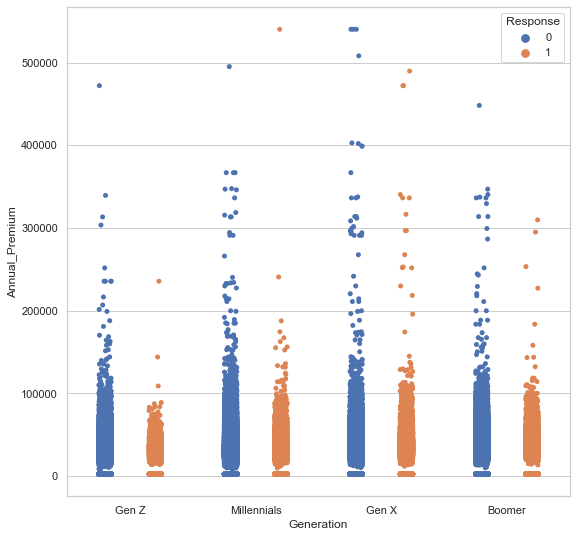

In [25]:
plt.figure(figsize=(9,9))
sns.stripplot(x = 'Generation', y = 'Annual_Premium', data = df, hue='Response', dodge=True).T
plt.show()

In [ ]:
df['Region_Code'].value_counts()

In [ ]:
pd.crosstab(index = df['Region_Code'], columns = df['Response']
            , margins=True, margins_name='Total').sort_values(0, ascending = False).head(10)